In [1]:
from modshogun import *
from numpy import *
from time import time
from sklearn import neighbors
from sklearn import metrics

In [2]:

csv = genfromtxt('isolet.csv', delimiter=",")
#labels=genfromtxt('madelon_y.csv', delimiter=",")

csv.shape

labels = csv[:, [-1]]
labels = array(labels.ravel())
labels.shape

#csv = delete(arr, -1, -1)
size=csv.shape
print size

ft=[True]*size[1]
ft=array(ft)
# number of test vectors
num_test_vectors = 200;

test_indices = random.randint(csv.shape[0], size = num_test_vectors)
test_features = csv[test_indices]
test_labels = labels[test_indices]
test_labels = array(test_labels.ravel())


# remove test vectors from training set
csv = delete(csv,test_indices,0)
labels = delete(labels,test_indices,0)

(7797, 618)


In [3]:
k = 20
train_feats = RealFeatures(csv.T)
train_lab = MulticlassLabels(labels)
# shogun test features and labels
test_feats = RealFeatures(test_features.T)
test_lab = MulticlassLabels(test_labels)
dist = EuclideanDistance(train_feats, train_feats)


In [4]:
def sk_knn(k):
    t1=time()
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf = clf.fit(csv, labels)
    predsk = clf.predict(test_features)
    acc = metrics.accuracy_score(test_labels, predsk)
    tsk = time() -t1
    return tsk, acc

#    print "-------------------"
#    print "SHAPE OF DATA:" , csv.shape
#    print "scikit :" + str(tsk)

In [5]:
def sg_knn(k):


    t0=time()

    knn = KNN(k, dist, train_lab)
    knn.set_use_covertree(True)
    knn.train()
    pred = knn.apply_multiclass(test_feats)
    evaluator = MulticlassAccuracy()
    accuracy = evaluator.evaluate(pred, test_lab)
    
    t= time()-t0
    return t, accuracy

#print "Shogun : " + str(t) 
#print "Accuracy = %2.2f%%" % (100*accuracy)

In [6]:
ks=linspace(10, 500, 20)
ks=ks.astype(int)

acc_sg=zeros(ks.shape[0])
acc_sk=zeros(ks.shape[0])
t_sg=zeros(ks.shape[0])
t_sk=zeros(ks.shape[0])

for i, j in enumerate(ks):
    t_sg[i], acc_sg[i] = sg_knn(j)
    t_sk[i], acc_sk[i] = sk_knn(j)   

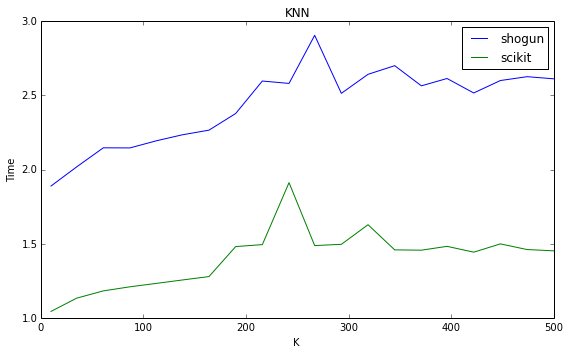

In [7]:
%matplotlib inline
import pylab as P
fig = P.figure(figsize=(8,5))
P.plot(ks, t_sg)
P.plot(ks, t_sk )
P.legend(["shogun", "scikit"])
P.xlabel('K')
P.ylabel('Time')
P.title('KNN')
P.tight_layout()

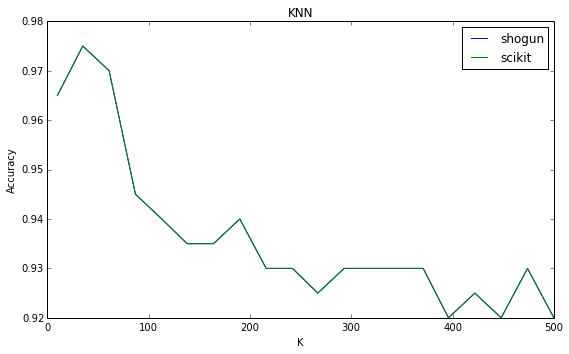

In [8]:
fig = P.figure(figsize=(8,5))
P.plot(ks, acc_sg)
P.plot(ks, acc_sk)
P.legend(["shogun", "scikit"])
P.xlabel('K')
P.ylabel('Accuracy')
P.title('KNN')
P.tight_layout()